# Tarea 2 | Visualización de Datos | Magíster en Ciencias de Datos UC 
---
## Luciano Davico
---

### Importamos los datos

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Diabetes_Tarea2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Renombramos la columna 'Outcome' por '¿Diabetes?'

In [16]:
df = df.rename(columns={'Outcome': '¿Diabetes?'})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,¿Diabetes?
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### a. Scatterplots entre insulina y glucosa; glucosa y presión arterial

#### Insulina vs glucosa (0: no hay diabetes; 1: hay diabetes)

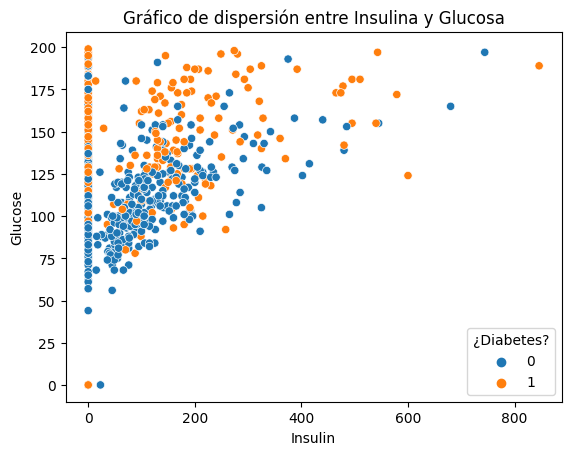

In [18]:
# Generamos el gráfico con los ejes
ax_a1 = sns.scatterplot(data=df, x='Insulin', y='Glucose', hue='¿Diabetes?')
# Seteamos el título
ax_a1.set_title('Gráfico de dispersión entre Insulina y Glucosa')
plt.show()

#### Glucosa vs presión arterial (0: no hay diabetes; 1: hay diabetes)

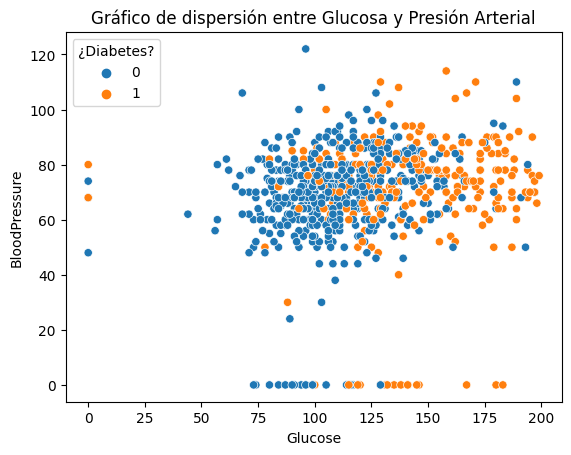

In [19]:
# Generamos el gráfico con los ejes
ax_a2 = sns.scatterplot(data=df, x='Glucose', y='BloodPressure', hue='¿Diabetes?')
# Seteamos el título
ax_a2.set_title('Gráfico de dispersión entre Glucosa y Presión Arterial')
plt.show()

### b. Boxplot de glucosa y BMI (IMC)

#### Separamos las edades en cuartiles

In [45]:
q1 = np.percentile(df.Age, 25)
q2 = np.percentile(df.Age, 50)
q3 = np.percentile(df.Age, 75)
q4 = np.percentile(df.Age, 100)

def set_quartile_classification(data, q1, q2, q3, q4):
    if data.Age <= q1:
        return f'[0, {q1}]'
    elif data.Age > q1 and data.Age <= q2:
        return f']{q1}, {q2}]'
    elif data.Age > q2 and data.Age <= q3:
        return f']{q2}, {q3}]'  
    else:
        return f']{q3}, {q4}]'

In [46]:
df['Age_interval'] = df.apply(lambda x: set_quartile_classification(x, q1, q2, q3, q4), axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,¿Diabetes?,Age_interval
0,6,148,72,35,0,33.6,0.627,50,1,"]41.0, 81.0]"
1,1,85,66,29,0,26.6,0.351,31,0,"]29.0, 41.0]"
2,8,183,64,0,0,23.3,0.672,32,1,"]29.0, 41.0]"
3,1,89,66,23,94,28.1,0.167,21,0,"[0, 24.0]"
4,0,137,40,35,168,43.1,2.288,33,1,"]29.0, 41.0]"
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"]41.0, 81.0]"
764,2,122,70,27,0,36.8,0.340,27,0,"]24.0, 29.0]"
765,5,121,72,23,112,26.2,0.245,30,0,"]29.0, 41.0]"
766,1,126,60,0,0,30.1,0.349,47,1,"]41.0, 81.0]"


#### Obtenemos el boxplot de Glucosa

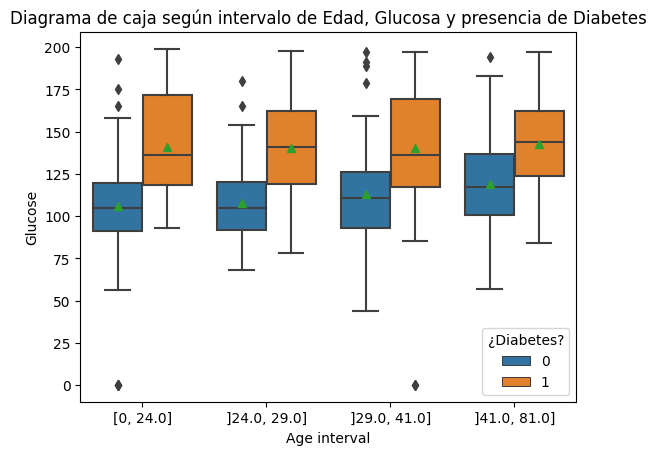

In [116]:
ax_b1 = sns.boxplot(data=df.sort_values('Age_interval'), x='Age_interval', y='Glucose', showmeans=True, hue='¿Diabetes?')
ax_b1.set_xlabel('Age interval')
ax_b1.set_ylabel('Glucose')
ax_b1.set_title('Diagrama de caja según intervalo de Edad, Glucosa y presencia de Diabetes')
plt.show()

#### Obtenemos el boxplot de IMC
Similarmente, cambiamos la variable `y` de nuestro gráfico

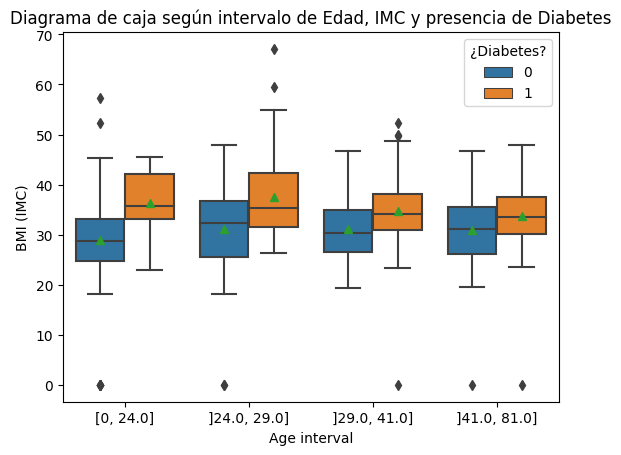

In [115]:
ax_b2 = sns.boxplot(data=df.sort_values('Age_interval'), x='Age_interval', y='BMI', showmeans=True, hue='¿Diabetes?')
ax_b2.set_xlabel('Age interval')
ax_b2.set_ylabel('BMI (IMC)')
ax_b2.set_title('Diagrama de caja según intervalo de Edad, IMC y presencia de Diabetes')
plt.show()

### c. Diagrama de violín de insulina y espesor de la piel

#### Diagrama de violón para insulina

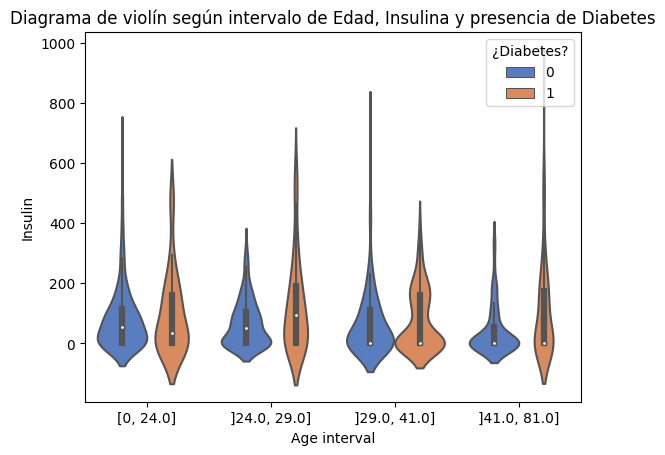

In [62]:
ax_c1 = sns.violinplot(data=df.sort_values('Age_interval'), x='Age_interval', y='Insulin', hue='¿Diabetes?', palette='muted')
ax_c1.set_xlabel('Age interval')
ax_c1.set_ylabel('Insulin')
ax_c1.set_title('Diagrama de violín según intervalo de Edad, Insulina y presencia de Diabetes')
plt.show()

#### Diagrama de violín para espesor de la piel 

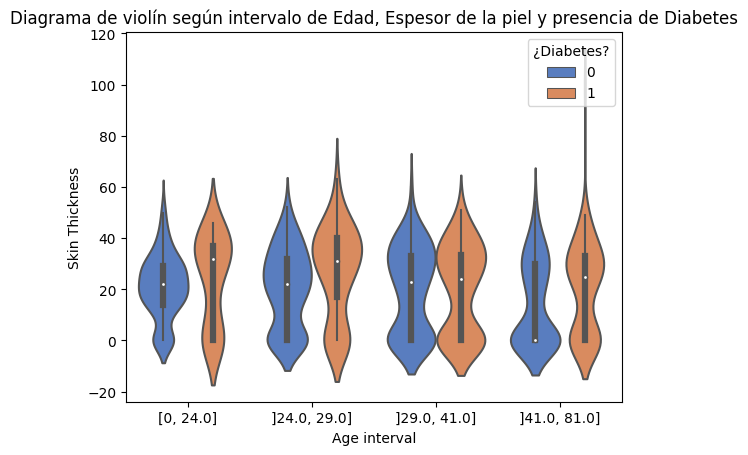

In [63]:
ax_c2 = sns.violinplot(data=df.sort_values('Age_interval'), x='Age_interval', y='SkinThickness', hue='¿Diabetes?', palette='muted')
ax_c2.set_xlabel('Age interval')
ax_c2.set_ylabel('Skin Thickness')
ax_c2.set_title('Diagrama de violín según intervalo de Edad, Espesor de la piel y presencia de Diabetes')
plt.show()

### d. Diagrama de torta por edad de pacientes

Primero creamos una columna de edad que separe en intervalos de a diez

In [65]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [78]:
def get_ten_length_interval_age(age):
    if 21 <= age and age <= 30:
        return '[21, 30]'
    elif 30 < age and age <= 40:
        return '[31, 40]'
    elif 40 < age and age <= 50:
        return '[41, 50]'
    elif 50 < age and age <= 60:
        return '[51, 60]'
    elif 60 < age and age <=70:
        return '[61, 70]'
    elif 70 < age and age <= 81:
        return '[71, 81]'
    
df['Age_10_interval'] = df['Age'].apply(get_ten_length_interval_age)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,¿Diabetes?,Age_interval,Age_10_interval
0,6,148,72,35,0,33.6,0.627,50,1,"]41.0, 81.0]","[41, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"]29.0, 41.0]","[31, 40]"
2,8,183,64,0,0,23.3,0.672,32,1,"]29.0, 41.0]","[31, 40]"
3,1,89,66,23,94,28.1,0.167,21,0,"[0, 24.0]","[21, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"]29.0, 41.0]","[31, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"]41.0, 81.0]","[61, 70]"
764,2,122,70,27,0,36.8,0.340,27,0,"]24.0, 29.0]","[21, 30]"
765,5,121,72,23,112,26.2,0.245,30,0,"]29.0, 41.0]","[21, 30]"
766,1,126,60,0,0,30.1,0.349,47,1,"]41.0, 81.0]","[41, 50]"


In [91]:
df_10_intervals = df.groupby('Age_10_interval')[['Age_10_interval']].count()
df_10_intervals = df_10_intervals.rename(columns={'Age_10_interval': 'count'}).reset_index()
df_10_intervals

,Age_10_interval,count
0,"[21, 30]",417
1,"[31, 40]",157
2,"[41, 50]",113
3,"[51, 60]",54
4,"[61, 70]",25
5,"[71, 81]",2


#### Creamos el gráfico de torta

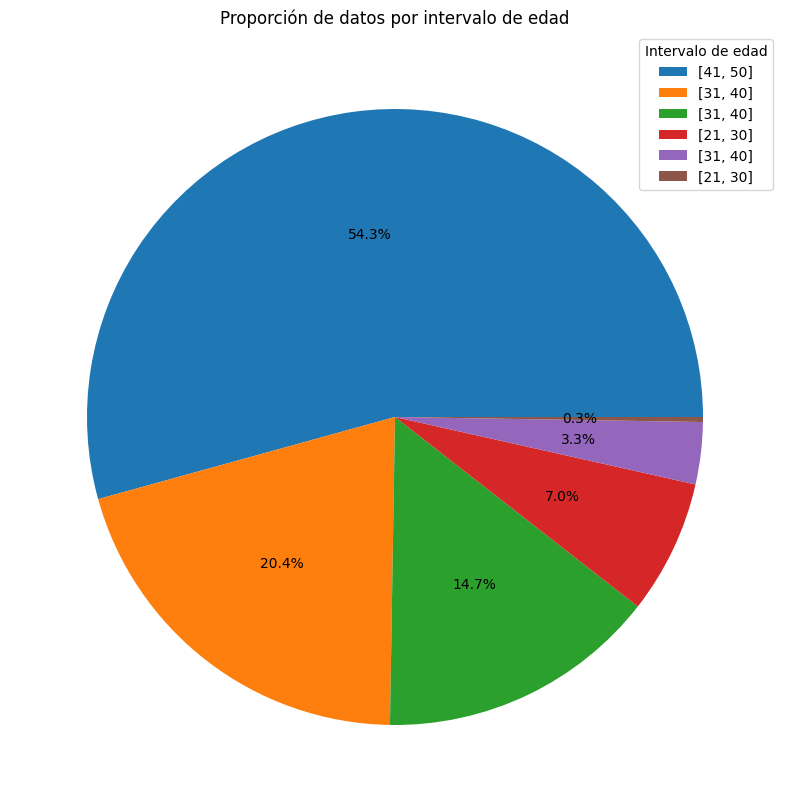

In [97]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot()

piechart_d = plot.pie(df_10_intervals['count'], autopct='%1.1f%%')
plot.legend(piechart_d[0], df['Age_10_interval'], title='Intervalo de edad')
plot.set_title('Proporción de datos por intervalo de edad')

plt.show()

### e. Gráfico de múltiples ejes separando por condición de diabetes

Importamos la librería necesaria

In [98]:
from pandas.plotting import parallel_coordinates

In [100]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,¿Diabetes?,Age_interval,Age_10_interval
0,6,148,72,35,0,33.6,0.627,50,1,"]41.0, 81.0]","[41, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"]29.0, 41.0]","[31, 40]"
2,8,183,64,0,0,23.3,0.672,32,1,"]29.0, 41.0]","[31, 40]"
3,1,89,66,23,94,28.1,0.167,21,0,"[0, 24.0]","[21, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"]29.0, 41.0]","[31, 40]"


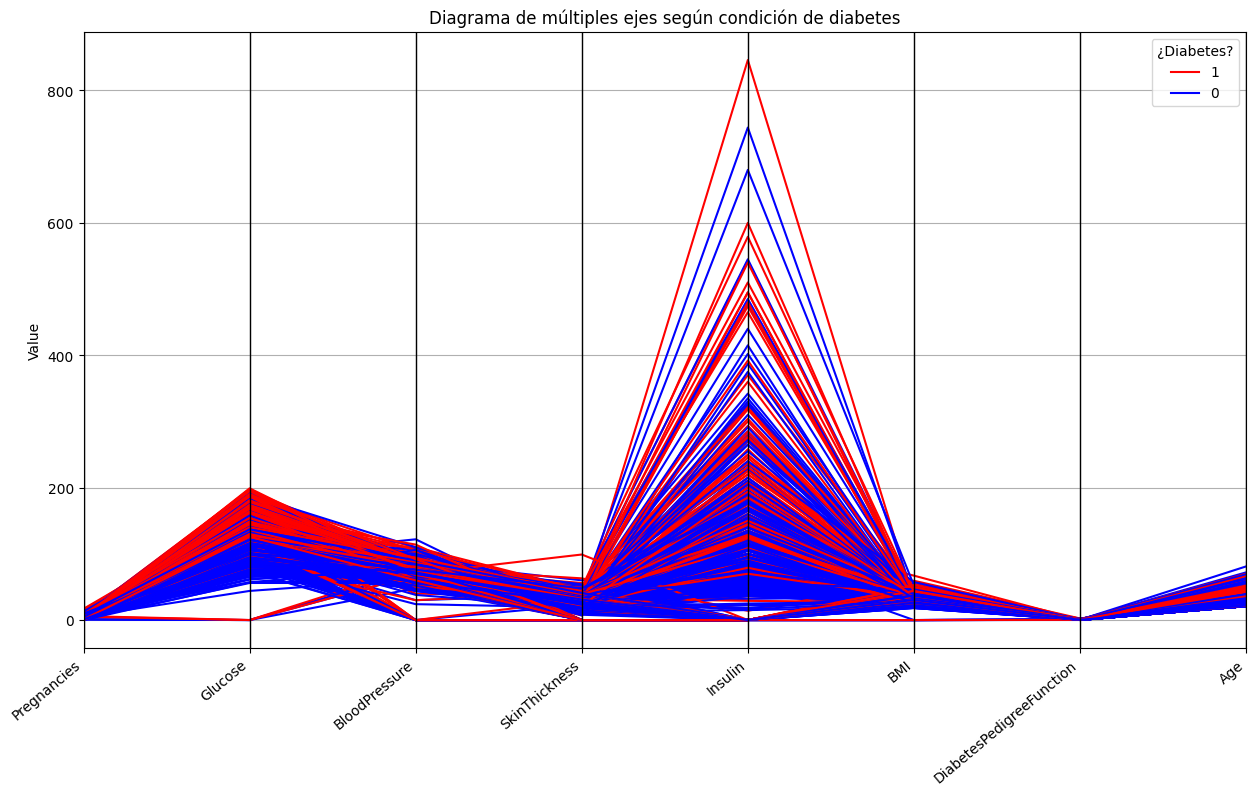

In [130]:
plt.figure(figsize=(15, 8))

original_columns = ['Pregnancies', 
                    'Glucose', 
                    'BloodPressure', 
                    'SkinThickness', 
                    'Insulin',
                    'BMI',
                    'DiabetesPedigreeFunction',
                    'Age',
                    '¿Diabetes?']
ax_e = parallel_coordinates(df[original_columns], '¿Diabetes?', color=('red', 'blue'))
ax_e.set_title('Diagrama de múltiples ejes según condición de diabetes')
ax_e.set_xticklabels(ax_e.get_xticklabels(), rotation=40, ha="right")
ax_e.set_ylabel('Value')
ax_e.legend(title='¿Diabetes?')
plt.show()